[*********************100%%**********************]  5 of 5 completed
<ipython-input-2-1b67cf72b2fb>:27: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change().dropna()


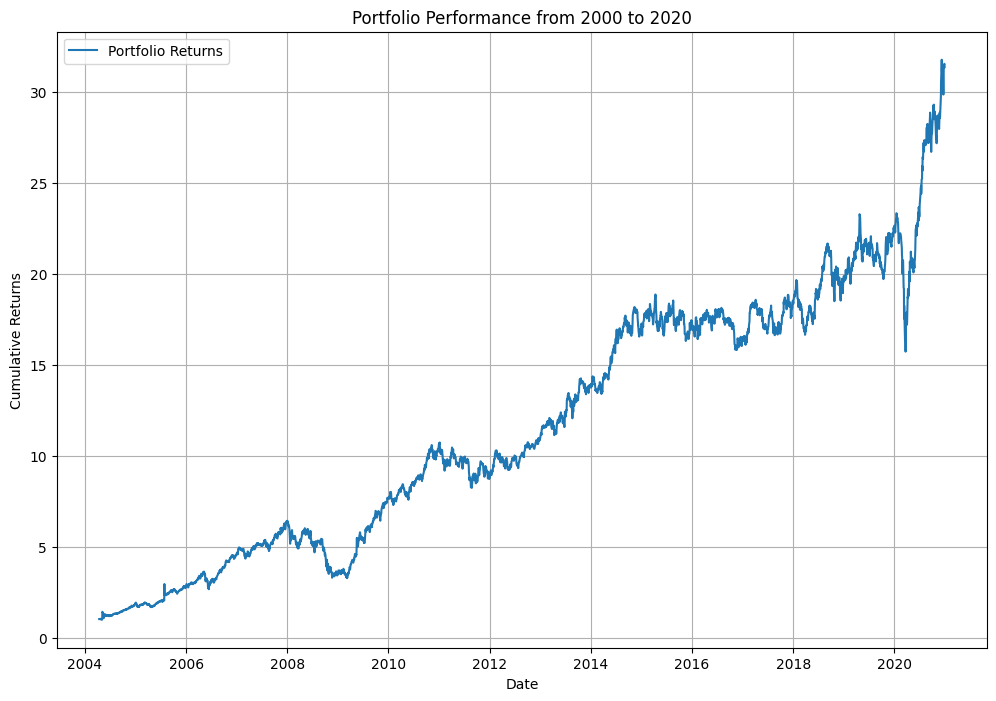

Sharpe Ratio: 0.87
Sortino Ratio: 1.37
Value at Risk (95%): 46.01%


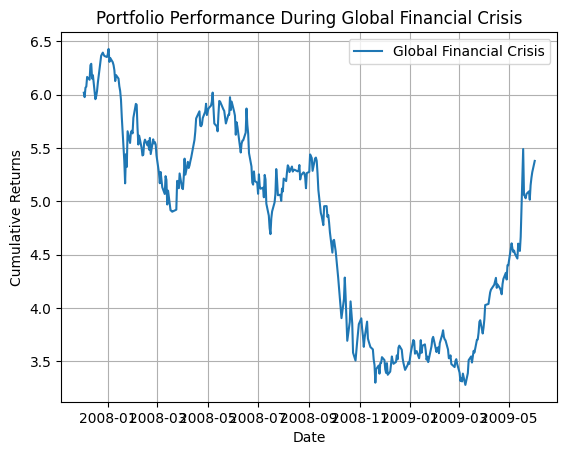

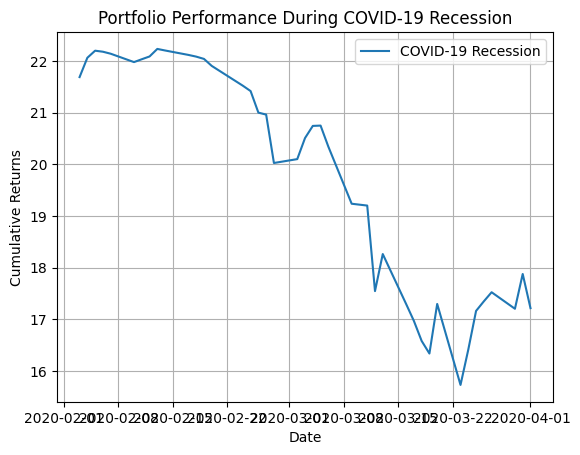

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'SUNPHARMA.NS', 'MAHABANK.NS']  # Adjusted to 8 tickers
start_date = '2000-01-01'  # Start date before the dot-com bubble
end_date = '2020-12-31'  # End date after the COVID-19 recession

# Step 2: Download the historical adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 3: Normalize the data (all starting at 100). This is to make sure that all the prices start from the same to avoid disturbance
normalized_data = data / data.iloc[0] * 100


# Step 4: Define portfolio allocation (sum must be 1)
weights = [0.325,0.325,0.325,0.325,0.325]  # Adjusted to 8 weights

# Ensure weights sum to 1
weights = np.array(weights)
weights = weights / weights.sum()

# Step 5: Calculate daily returns
daily_returns = data.pct_change().dropna()

# Step 6: Calculate portfolio returns
portfolio_daily_returns = daily_returns.dot(weights)
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

# Step 7: Plot the portfolio performance over time
plt.figure(figsize=(12, 8))
plt.plot(cumulative_returns, label="Portfolio Returns")
plt.title('Portfolio Performance from 2000 to 2020')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Calculate quantitative metrics

# Sharpe Ratio
risk_free_rate = 0.01  # Assumed annual risk-free rate (e.g., 1%)
sharpe_ratio = (portfolio_daily_returns.mean() - risk_free_rate/252) / portfolio_daily_returns.std() * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Sortino Ratio (downside deviation)
negative_returns = portfolio_daily_returns[portfolio_daily_returns < 0]
sortino_ratio = (portfolio_daily_returns.mean() - risk_free_rate/252) / negative_returns.std() * np.sqrt(252)
print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Value at Risk (VaR)
confidence_level = 0.95
portfolio_mean = portfolio_daily_returns.mean()
portfolio_std = portfolio_daily_returns.std()
VaR = norm.ppf(1 - confidence_level) * portfolio_std - portfolio_mean
VaR_annualized = VaR * np.sqrt(252)
print(f"Value at Risk (95%): {-VaR_annualized:.2%}")

# Step 9: Qualitative analysis through visualizing key recession periods

recession_periods = {
    'Global Financial Crisis': ('2007-12-01', '2009-06-01'),
    'COVID-19 Recession': ('2020-02-01', '2020-04-01')
}

for recession, (start, end) in recession_periods.items():
    recession_returns = cumulative_returns.loc[start:end]
    plt.plot(recession_returns, label=f'{recession}')
    plt.title(f'Portfolio Performance During {recession}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.grid(True)
    plt.legend()
    plt.show()
